In [1]:
'''
Example for diagnostic delay, graphs which will be created locally after
data is sent to us.
'''

'\nExample for diagnostic delay, graphs which will be created locally after\ndata is sent to us.\n'

In [2]:
import pandas.io.sql
import pyodbc
import pandas as pd
import tqdm
from collections import defaultdict, Counter
import pickle
import numpy as np
import glob

In [3]:
import sys

In [4]:
sys.path.append('C:\\Users\\tonys\\Documents\\Research\\characterizationPaperPackage\\inst\\py\\')

In [5]:
from settings_sqlserver import *

Imported settings...
Current path:  C:\Users\tonys\Documents\Research\characterizationPaperPackage\inst\py\


In [6]:
# Create the connection
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+db+';UID='+user+';PWD='+ password)

In [7]:
per_patient_TTD_dict = {}
per_patient_TTD_dict[db] = {}

phenotypes = pd.read_csv('../csv/phenotype_lookups_final.csv', encoding = 'unicode_escape')
final = pd.read_csv('../../output/created_files/' + db + '_common_symptom_tfidf_final.csv')

In [8]:
def dd():
    return defaultdict(int)

concept_id_mapper = defaultdict(dd) # dd is a module-level function

with open('../../output/created_files/' + db + '_common_symptoms.pickle', 'rb') as handle:
    concept_id_mapper = pickle.load(handle)

In [9]:
cohort_files = pd.read_csv('../settings/CohortsToCreateFinal.csv')

In [10]:
with open('../csv/exclude_concepts_all_final.csv', 'r') as handle:
    excluded = handle.readlines()

In [11]:
summary_fp = '../../output/summaries/' + db + '/'

In [19]:
from time import time

In [20]:
for summary_file in tqdm.tqdm(glob.glob(summary_fp + '*')):
    a = time()
    cohort_file_id = summary_file.split('\\')[-1].split('_')[0]
    cohort_id = str(cohort_file_id)
    
    tmp = []

    for ele in excluded:
        if ele.strip('\n').split(',')[0] == cohort_id:
            tmp = ele.strip('\n').split(',')

    # ccae_df = pd.read_csv(base_fp + cohort_id + '.csv', encoding = 'unicode_escape', sep='|', names=names)

    # Let's get remove concepts that are in the definition set
    valid_top_N = []
    skipped = []

    for i, condition_concept_id in enumerate(final.sort_values(by=cohort_id, ascending=False)['condition_concept_id'].values):
        if str(condition_concept_id) in tmp[1:]:
            skipped.append(i)
            continue;
        else:
            valid_top_N.append(condition_concept_id)
        if len(valid_top_N) == 50:
            break;
    
    sql_query_string = 'select person_id, gender_concept_id, condition_concept_id, concept_name, time_to_onset from ' + db + '.results.sexdiff_cohort_ttonset_v5 where cohort_definition_id = ' + str(cohort_file_id);

    conds = ', '.join([str(x) for x in valid_top_N])
    sql_query_string = sql_query_string + ' and condition_concept_id in (' + conds + ');'
    df = pandas.io.sql.read_sql(sql_query_string , conn)
    print('Elapsed time:')
    print(time() - a)
    

  1%|▋                                                                                 | 1/114 [00:01<02:52,  1.53s/it]

Elapsed time:
1.5263903141021729


  2%|█▍                                                                                | 2/114 [00:02<02:14,  1.20s/it]

Elapsed time:
0.9657654762268066


  3%|██▏                                                                               | 3/114 [00:03<02:09,  1.16s/it]

Elapsed time:
1.118105411529541


  4%|██▉                                                                               | 4/114 [00:04<02:14,  1.22s/it]

Elapsed time:
1.311570644378662


  4%|███▌                                                                              | 5/114 [00:06<02:19,  1.28s/it]

Elapsed time:
1.3771014213562012


  5%|████▎                                                                             | 6/114 [00:07<02:16,  1.26s/it]

Elapsed time:
1.232306957244873


  6%|█████                                                                             | 7/114 [00:08<02:09,  1.21s/it]

Elapsed time:
1.1124200820922852


  7%|█████▊                                                                            | 8/114 [00:09<02:01,  1.15s/it]

Elapsed time:
0.9875068664550781


  8%|██████▍                                                                           | 9/114 [00:10<01:53,  1.08s/it]

Elapsed time:
0.9419898986816406


  9%|███████                                                                          | 10/114 [00:11<01:47,  1.03s/it]

Elapsed time:
0.9107468128204346


 10%|███████▊                                                                         | 11/114 [00:12<01:42,  1.01it/s]

Elapsed time:
0.9083607196807861


 11%|████████▌                                                                        | 12/114 [00:13<01:49,  1.07s/it]

Elapsed time:
1.2466344833374023


 11%|█████████▏                                                                       | 13/114 [00:14<01:44,  1.04s/it]

Elapsed time:
0.9570374488830566


 12%|█████████▉                                                                       | 14/114 [00:15<01:41,  1.02s/it]

Elapsed time:
0.9805130958557129


 13%|██████████▋                                                                      | 15/114 [00:16<01:37,  1.01it/s]

Elapsed time:
0.9200775623321533


 14%|███████████▎                                                                     | 16/114 [00:17<01:35,  1.03it/s]

Elapsed time:
0.9415979385375977


 15%|████████████                                                                     | 17/114 [00:18<01:33,  1.04it/s]

Elapsed time:
0.9430570602416992


 16%|████████████▊                                                                    | 18/114 [00:19<01:31,  1.05it/s]

Elapsed time:
0.9244732856750488


 17%|█████████████▌                                                                   | 19/114 [00:20<01:29,  1.06it/s]

Elapsed time:
0.9139416217803955


 18%|██████████████▏                                                                  | 20/114 [00:21<01:28,  1.06it/s]

Elapsed time:
0.9547078609466553


 18%|██████████████▉                                                                  | 21/114 [00:22<01:26,  1.07it/s]

Elapsed time:
0.9019637107849121


 19%|███████████████▋                                                                 | 22/114 [00:23<01:29,  1.03it/s]

Elapsed time:
1.0570647716522217


 20%|████████████████▎                                                                | 23/114 [00:24<01:26,  1.05it/s]

Elapsed time:
0.9056787490844727


 21%|█████████████████                                                                | 24/114 [00:25<01:35,  1.06s/it]

Elapsed time:
1.3049607276916504


 22%|█████████████████▊                                                               | 25/114 [00:26<01:30,  1.02s/it]

Elapsed time:
0.9185762405395508


 23%|██████████████████▍                                                              | 26/114 [00:27<01:36,  1.10s/it]

Elapsed time:
1.2859523296356201


 24%|███████████████████▏                                                             | 27/114 [00:28<01:31,  1.05s/it]

Elapsed time:
0.9470069408416748


 25%|███████████████████▉                                                             | 28/114 [00:30<01:50,  1.28s/it]

Elapsed time:
1.8277695178985596


 25%|████████████████████▌                                                            | 29/114 [00:31<01:41,  1.20s/it]

Elapsed time:
1.0009117126464844


 26%|█████████████████████▎                                                           | 30/114 [00:32<01:35,  1.13s/it]

Elapsed time:
0.9737086296081543


 27%|██████████████████████                                                           | 31/114 [00:33<01:31,  1.11s/it]

Elapsed time:
1.0427651405334473


 28%|██████████████████████▋                                                          | 32/114 [00:34<01:26,  1.06s/it]

Elapsed time:
0.9444777965545654


 29%|███████████████████████▍                                                         | 33/114 [00:35<01:25,  1.05s/it]

Elapsed time:
1.041687250137329


 30%|████████████████████████▏                                                        | 34/114 [00:36<01:33,  1.17s/it]

Elapsed time:
1.4439005851745605


 31%|████████████████████████▊                                                        | 35/114 [00:37<01:26,  1.10s/it]

Elapsed time:
0.9385488033294678


 32%|█████████████████████████▌                                                       | 36/114 [00:38<01:23,  1.07s/it]

Elapsed time:
0.9865920543670654


 32%|██████████████████████████▎                                                      | 37/114 [00:39<01:23,  1.09s/it]

Elapsed time:
1.131856918334961


 33%|███████████████████████████                                                      | 38/114 [00:40<01:19,  1.05s/it]

Elapsed time:
0.9587230682373047


 34%|███████████████████████████▋                                                     | 39/114 [00:41<01:20,  1.07s/it]

Elapsed time:
1.1150226593017578


 35%|████████████████████████████▍                                                    | 40/114 [00:43<01:22,  1.12s/it]

Elapsed time:
1.238227128982544


 36%|█████████████████████████████▏                                                   | 41/114 [00:44<01:18,  1.07s/it]

Elapsed time:
0.9597940444946289


 37%|█████████████████████████████▊                                                   | 42/114 [00:45<01:25,  1.19s/it]

Elapsed time:
1.4557766914367676


 38%|██████████████████████████████▌                                                  | 43/114 [00:46<01:24,  1.18s/it]

Elapsed time:
1.1740639209747314


 39%|███████████████████████████████▎                                                 | 44/114 [00:47<01:17,  1.11s/it]

Elapsed time:
0.9450383186340332


 39%|███████████████████████████████▉                                                 | 45/114 [00:48<01:16,  1.10s/it]

Elapsed time:
1.0745739936828613


 40%|████████████████████████████████▋                                                | 46/114 [00:50<01:27,  1.29s/it]

Elapsed time:
1.7336726188659668


 41%|█████████████████████████████████▍                                               | 47/114 [00:51<01:20,  1.20s/it]

Elapsed time:
0.998248815536499


 42%|██████████████████████████████████                                               | 48/114 [00:52<01:21,  1.24s/it]

Elapsed time:
1.3185815811157227


 43%|██████████████████████████████████▊                                              | 49/114 [00:53<01:15,  1.16s/it]

Elapsed time:
0.9718034267425537


 44%|███████████████████████████████████▌                                             | 50/114 [00:54<01:12,  1.13s/it]

Elapsed time:
1.0784711837768555


 45%|████████████████████████████████████▏                                            | 51/114 [00:55<01:07,  1.08s/it]

Elapsed time:
0.9481306076049805


 46%|████████████████████████████████████▉                                            | 52/114 [00:56<01:04,  1.04s/it]

Elapsed time:
0.9470529556274414


 46%|█████████████████████████████████████▋                                           | 53/114 [00:57<01:02,  1.02s/it]

Elapsed time:
0.962270975112915


 47%|██████████████████████████████████████▎                                          | 54/114 [00:59<01:07,  1.12s/it]

Elapsed time:
1.3584680557250977


 48%|███████████████████████████████████████                                          | 55/114 [01:01<01:30,  1.53s/it]

Elapsed time:
2.4742016792297363


 49%|███████████████████████████████████████▊                                         | 56/114 [01:02<01:19,  1.38s/it]

Elapsed time:
1.0303282737731934


 50%|████████████████████████████████████████▌                                        | 57/114 [01:07<02:18,  2.43s/it]

Elapsed time:
4.889472484588623


 51%|█████████████████████████████████████████▏                                       | 58/114 [01:10<02:26,  2.61s/it]

Elapsed time:
3.0379042625427246


 52%|█████████████████████████████████████████▉                                       | 59/114 [01:12<02:07,  2.32s/it]

Elapsed time:
1.6389732360839844


 53%|██████████████████████████████████████████▋                                      | 60/114 [01:13<01:52,  2.09s/it]

Elapsed time:
1.5453219413757324


 54%|███████████████████████████████████████████▎                                     | 61/114 [01:14<01:32,  1.75s/it]

Elapsed time:
0.9629733562469482


 54%|████████████████████████████████████████████                                     | 62/114 [01:15<01:18,  1.51s/it]

Elapsed time:
0.9447863101959229


 55%|████████████████████████████████████████████▊                                    | 63/114 [01:16<01:08,  1.34s/it]

Elapsed time:
0.9330227375030518


 56%|█████████████████████████████████████████████▍                                   | 64/114 [01:17<01:00,  1.22s/it]

Elapsed time:
0.9457395076751709


 57%|██████████████████████████████████████████████▏                                  | 65/114 [01:18<00:56,  1.15s/it]

Elapsed time:
0.9833452701568604


 58%|██████████████████████████████████████████████▉                                  | 66/114 [01:19<00:53,  1.12s/it]

Elapsed time:
1.0539023876190186


 59%|███████████████████████████████████████████████▌                                 | 67/114 [01:20<00:50,  1.08s/it]

Elapsed time:
0.9729714393615723


 60%|████████████████████████████████████████████████▎                                | 68/114 [01:22<01:05,  1.43s/it]

Elapsed time:
2.2490477561950684


 61%|█████████████████████████████████████████████████                                | 69/114 [01:23<00:57,  1.28s/it]

Elapsed time:
0.920238733291626


 61%|█████████████████████████████████████████████████▋                               | 70/114 [01:34<03:00,  4.11s/it]

Elapsed time:
10.729292631149292


 62%|██████████████████████████████████████████████████▍                              | 71/114 [01:35<02:15,  3.16s/it]

Elapsed time:
0.9242496490478516


 63%|███████████████████████████████████████████████████▏                             | 72/114 [01:36<01:52,  2.67s/it]

Elapsed time:
1.5459294319152832


 64%|███████████████████████████████████████████████████▊                             | 73/114 [01:37<01:27,  2.14s/it]

Elapsed time:
0.9021320343017578


 65%|████████████████████████████████████████████████████▌                            | 74/114 [01:38<01:11,  1.78s/it]

Elapsed time:
0.9335997104644775


 66%|█████████████████████████████████████████████████████▎                           | 75/114 [01:39<00:59,  1.53s/it]

Elapsed time:
0.9425013065338135


 67%|██████████████████████████████████████████████████████                           | 76/114 [01:40<00:51,  1.36s/it]

Elapsed time:
0.9499452114105225


 68%|██████████████████████████████████████████████████████▋                          | 77/114 [01:41<00:45,  1.23s/it]

Elapsed time:
0.9399490356445312


 68%|███████████████████████████████████████████████████████▍                         | 78/114 [01:42<00:40,  1.13s/it]

Elapsed time:
0.8957257270812988


 69%|████████████████████████████████████████████████████████▏                        | 79/114 [01:43<00:37,  1.08s/it]

Elapsed time:
0.9509987831115723


 70%|████████████████████████████████████████████████████████▊                        | 80/114 [01:44<00:35,  1.04s/it]

Elapsed time:
0.9453086853027344


 71%|█████████████████████████████████████████████████████████▌                       | 81/114 [01:46<00:41,  1.26s/it]

Elapsed time:
1.7618906497955322


 72%|██████████████████████████████████████████████████████████▎                      | 82/114 [01:47<00:36,  1.15s/it]

Elapsed time:
0.9049394130706787


 73%|██████████████████████████████████████████████████████████▉                      | 83/114 [01:47<00:33,  1.08s/it]

Elapsed time:
0.9263722896575928


 74%|███████████████████████████████████████████████████████████▋                     | 84/114 [01:49<00:34,  1.14s/it]

Elapsed time:
1.261063814163208


 75%|████████████████████████████████████████████████████████████▍                    | 85/114 [01:50<00:31,  1.09s/it]

Elapsed time:
0.9731845855712891


 75%|█████████████████████████████████████████████████████████████                    | 86/114 [01:51<00:29,  1.05s/it]

Elapsed time:
0.9628074169158936


 76%|█████████████████████████████████████████████████████████████▊                   | 87/114 [01:52<00:27,  1.02s/it]

Elapsed time:
0.9368538856506348


 77%|██████████████████████████████████████████████████████████████▌                  | 88/114 [01:53<00:29,  1.15s/it]

Elapsed time:
1.448533535003662


 78%|███████████████████████████████████████████████████████████████▏                 | 89/114 [01:54<00:27,  1.11s/it]

Elapsed time:
1.0327281951904297


 79%|███████████████████████████████████████████████████████████████▉                 | 90/114 [01:55<00:25,  1.08s/it]

Elapsed time:
0.9946465492248535


 80%|████████████████████████████████████████████████████████████████▋                | 91/114 [01:56<00:23,  1.02s/it]

Elapsed time:
0.8893923759460449


 81%|█████████████████████████████████████████████████████████████████▎               | 92/114 [01:57<00:21,  1.01it/s]

Elapsed time:
0.9261674880981445


 82%|██████████████████████████████████████████████████████████████████               | 93/114 [01:58<00:22,  1.08s/it]

Elapsed time:
1.2874958515167236


 82%|██████████████████████████████████████████████████████████████████▊              | 94/114 [01:59<00:22,  1.15s/it]

Elapsed time:
1.305938482284546


 83%|███████████████████████████████████████████████████████████████████▌             | 95/114 [02:00<00:20,  1.10s/it]

Elapsed time:
0.9740922451019287


 84%|████████████████████████████████████████████████████████████████████▏            | 96/114 [02:01<00:18,  1.05s/it]

Elapsed time:
0.9500243663787842


 85%|████████████████████████████████████████████████████████████████████▉            | 97/114 [02:02<00:17,  1.03s/it]

Elapsed time:
0.9720492362976074


 86%|█████████████████████████████████████████████████████████████████████▋           | 98/114 [02:03<00:16,  1.05s/it]

Elapsed time:
1.083064317703247


 87%|██████████████████████████████████████████████████████████████████████▎          | 99/114 [02:05<00:16,  1.07s/it]

Elapsed time:
1.1353838443756104


 88%|██████████████████████████████████████████████████████████████████████▏         | 100/114 [02:06<00:14,  1.02s/it]

Elapsed time:
0.8963658809661865


 89%|██████████████████████████████████████████████████████████████████████▉         | 101/114 [02:06<00:12,  1.00it/s]

Elapsed time:
0.951873779296875


 89%|███████████████████████████████████████████████████████████████████████▌        | 102/114 [02:07<00:11,  1.03it/s]

Elapsed time:
0.913642406463623


 90%|████████████████████████████████████████████████████████████████████████▎       | 103/114 [02:08<00:10,  1.03it/s]

Elapsed time:
0.9741027355194092


 91%|████████████████████████████████████████████████████████████████████████▉       | 104/114 [02:09<00:09,  1.04it/s]

Elapsed time:
0.9391276836395264


 92%|█████████████████████████████████████████████████████████████████████████▋      | 105/114 [02:11<00:11,  1.28s/it]

Elapsed time:
2.012998104095459


 93%|██████████████████████████████████████████████████████████████████████████▍     | 106/114 [02:12<00:09,  1.17s/it]

Elapsed time:
0.9021296501159668


 94%|███████████████████████████████████████████████████████████████████████████     | 107/114 [02:13<00:07,  1.09s/it]

Elapsed time:
0.9144408702850342


 95%|███████████████████████████████████████████████████████████████████████████▊    | 108/114 [02:14<00:06,  1.04s/it]

Elapsed time:
0.9350898265838623


 96%|████████████████████████████████████████████████████████████████████████████▍   | 109/114 [02:17<00:07,  1.60s/it]

Elapsed time:
2.890632152557373


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 110/114 [02:18<00:05,  1.40s/it]

Elapsed time:
0.931962251663208


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 111/114 [02:19<00:03,  1.24s/it]

Elapsed time:
0.8704867362976074


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 112/114 [02:20<00:02,  1.15s/it]

Elapsed time:
0.9224598407745361


 99%|███████████████████████████████████████████████████████████████████████████████▎| 113/114 [02:23<00:01,  1.76s/it]

Elapsed time:
3.186950445175171


100%|████████████████████████████████████████████████████████████████████████████████| 114/114 [02:24<00:00,  1.27s/it]

Elapsed time:
1.616161823272705


In [17]:
conds = ', '.join([str(x) for x in valid_top_N])


In [21]:
# 5x speed up.
for summary_file in tqdm.tqdm(glob.glob(summary_fp + '*')):
    a = time()
    cohort_file_id = summary_file.split('\\')[-1].split('_')[0]
    cohort_id = str(cohort_file_id)
    
    tmp = []

    for ele in excluded:
        if ele.strip('\n').split(',')[0] == cohort_id:
            tmp = ele.strip('\n').split(',')

    # ccae_df = pd.read_csv(base_fp + cohort_id + '.csv', encoding = 'unicode_escape', sep='|', names=names)

    # Let's get remove concepts that are in the definition set
    valid_top_N = []
    skipped = []

    for i, condition_concept_id in enumerate(final.sort_values(by=cohort_id, ascending=False)['condition_concept_id'].values):
        if str(condition_concept_id) in tmp[1:]:
            skipped.append(i)
            continue;
        else:
            valid_top_N.append(condition_concept_id)
        if len(valid_top_N) == 50:
            break;
    
    sql_query_string = 'select person_id, gender_concept_id, condition_concept_id, concept_name, time_to_onset from ' + db + '.results.sexdiff_cohort_ttonset_v5 where cohort_definition_id = ' + str(cohort_file_id);

    # conds = ', '.join([str(x) for x in valid_top_N])
    # sql_query_string = sql_query_string + ' and condition_concept_id in (' + conds + ');'
    df = pandas.io.sql.read_sql(sql_query_string , conn)
    print('Elapsed time:')
    print(time() - a)

  1%|▋                                                                                 | 1/114 [00:07<14:03,  7.46s/it]

Elapsed time:
7.460705757141113


  2%|█▍                                                                                | 2/114 [00:09<08:29,  4.55s/it]

Elapsed time:
2.5051286220550537


  3%|██▏                                                                               | 3/114 [00:15<09:14,  5.00s/it]

Elapsed time:
5.538671493530273


  3%|██▏                                                                               | 3/114 [00:22<14:10,  7.66s/it]


KeyboardInterrupt: 

In [68]:


    # Get the subset of the DF with only these top 50 symptoms
    subset_df = df[df.condition_concept_id.isin(valid_top_N)]

    women_df = subset_df[subset_df.gender_concept_id == 8532]
    men_df   = subset_df[subset_df.gender_concept_id == 8507]

    first_occur_women = women_df.sort_values(by=['person_id', 'time_to_onset'], ascending=False).drop_duplicates(subset=['person_id'])
    first_occur_men = men_df.sort_values(by=['person_id', 'time_to_onset'], ascending=False).drop_duplicates(subset=['person_id'])

    TTO_val_MAX_women = np.asarray(list(first_occur_women.time_to_onset.values))
    # TTO_val_MEAN_women = []
    condition_name_MAX_women = list(first_occur_women.concept_name.values)

    TTO_val_MAX_men = np.asarray(list(first_occur_men.time_to_onset.values))
    # TTO_val_MEAN_men = []
    condition_name_MAX_men = list(first_occur_men.concept_name.values)

    # Sorted list takes a lot more space. Let's just store the counted values
    # (valid_top_N, TTO_val_MAX_women, TTO_val_MAX_men, condition_name_MAX_women, condition_name_MAX_men)
    
    per_patient_TTD_dict[db][cohort_id] = (valid_top_N, Counter(TTO_val_MAX_women), Counter(TTO_val_MAX_men), Counter(condition_name_MAX_women), Counter(condition_name_MAX_men))

with open('../../output/created_files/' + db + '_per_patient_TTD_.pickle', 'wb') as handle:
    pickle.dump(per_patient_TTD_dict[db], handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|████████████████████████████████████████████████████████████████████████████████| 114/114 [30:22<00:00, 15.99s/it]


In [72]:
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
import sys

In [54]:
# Note the sizes of these various files
sys.getsizeof(valid_top_N)

472

In [55]:
# Note the sizes of these various files
sys.getsizeof(TTO_val_MAX_women)

244904

In [56]:
# Note the sizes of these various files
sys.getsizeof(condition_name_MAX_women)

244856

In [58]:
# The Counter() version for histograms is enough, and is 100x smaller.
sys.getsizeof(Counter(condition_name_MAX_women))

2288

In [59]:
# The Counter() version for histograms is enough, and is 10x smaller.
sys.getsizeof(Counter(TTO_val_MAX_women))

36976

In [82]:
counts = [x for x in per_patient_TTD_dict[db]['11111'][1].keys()]
vals   = [x for x in per_patient_TTD_dict[db]['11111'][1].values()]

In [89]:
max(vals)

4490

<BarContainer object of 1095 artists>

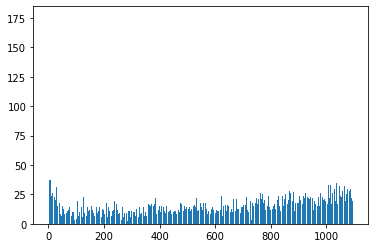

In [94]:
plt.bar(counts[1:], vals[1:])